In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Twitter_Data.csv')

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
print(f"Total tweets: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Total tweets: 162980
Columns: ['clean_text', 'category']


In [5]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
clean_text    4
category      7
dtype: int64


In [6]:
print(f"\nDuplicates: {df.duplicated().sum()}")


Duplicates: 1


In [7]:
print("\nSentiment distribution:")
print(df['category'].value_counts())


Sentiment distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [8]:
df = df.dropna()
df = df.drop_duplicates()
print(f"\nRows after cleaning: {len(df)}")


Rows after cleaning: 162969


In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text
sample = df['clean_text'].iloc[0]
print("Original:")
print(sample)
print("\nProcessed:")
print(preprocess_text(sample))

Original:
when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed:
modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples


In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
df['processed_text'] = df['clean_text'].apply(preprocess_text)
print(f"✅ Processed {len(df)} tweets")

✅ Processed 162969 tweets


In [18]:
df[['clean_text', 'processed_text', 'category']].head()

,clean_text,processed_text,category
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...,-1.0
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,0.0
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,1.0
3,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,1.0
4,answer who among these the most powerful world...,answer among powerful world leader today trump...,1.0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['processed_text'])
y = df['category']

print(f"Feature matrix shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Feature matrix shape: (162969, 5000)
Number of features: 5000
Number of samples: 162969


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} tweets")
print(f"Testing set: {X_test.shape[0]} tweets")

Training set: 130375 tweets
Testing set: 32594 tweets


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7268

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.44      0.58      7152
         0.0       0.84      0.66      0.74     11067
         1.0       0.65      0.93      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.79      0.67      0.69     32594
weighted avg       0.77      0.73      0.72     32594



In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.8923


In [25]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9025


SVM MODEL - DETAILED RESULTS
              precision    recall  f1-score   support

    Negative       0.88      0.81      0.85      7152
     Neutral       0.88      0.97      0.92     11067
    Positive       0.93      0.89      0.91     14375

    accuracy                           0.90     32594
   macro avg       0.90      0.89      0.89     32594
weighted avg       0.90      0.90      0.90     32594



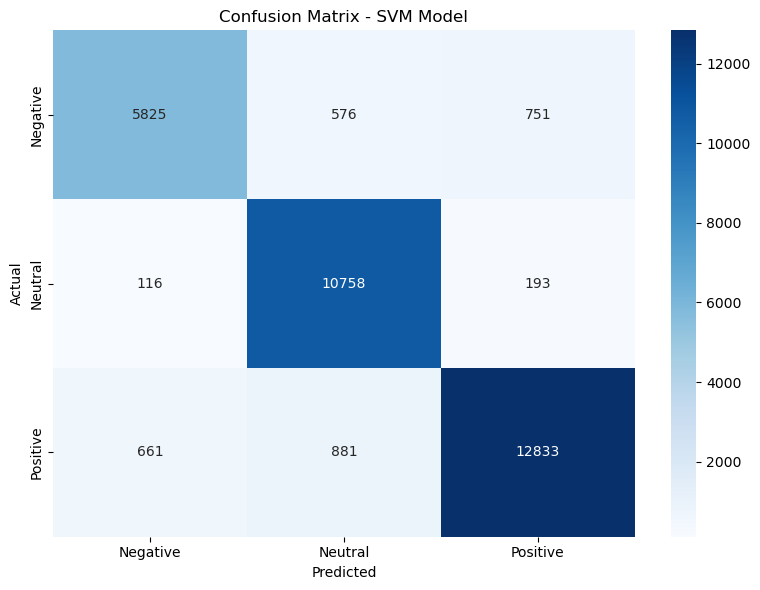

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("="*50)
print("SVM MODEL - DETAILED RESULTS")
print("="*50)
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

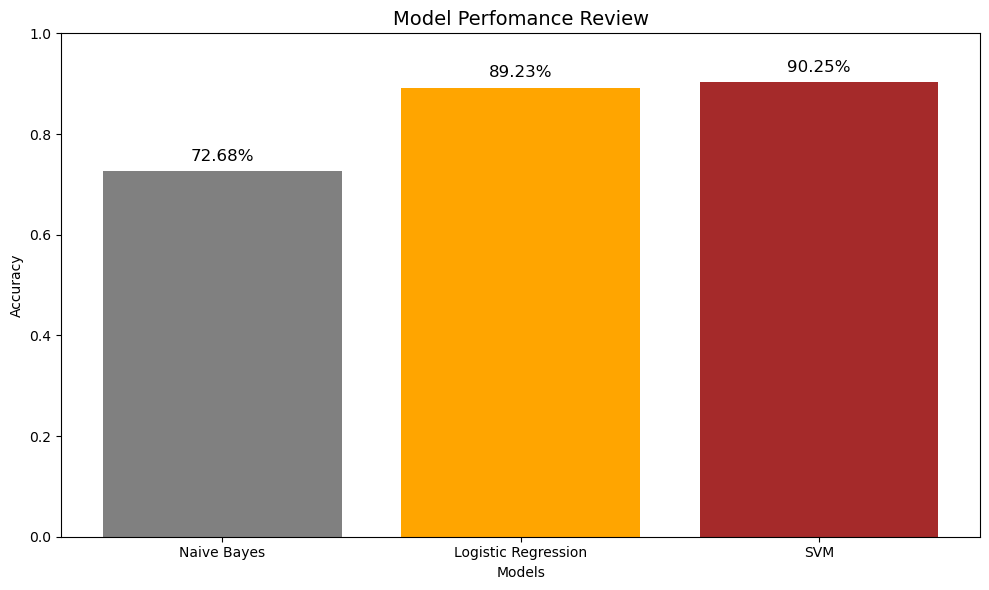

In [31]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [nb_accuracy, lr_accuracy, svm_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['grey', 'orange', 'brown'])
plt.title('Model Perfomance Review', fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('ModelComparison.png')
plt.show()

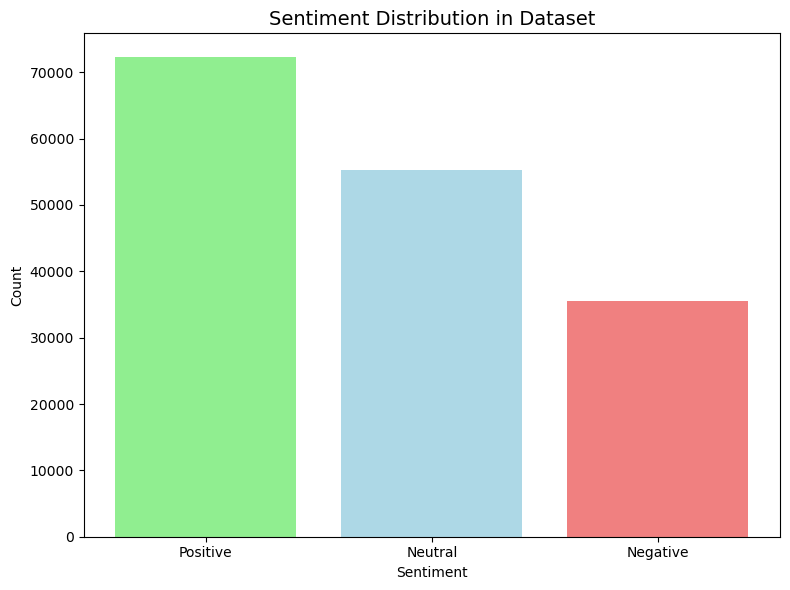

In [32]:
plt.figure(figsize=(8, 6))
sentiment_counts = df['category'].value_counts()
sentiment_labels = ['Positive', 'Neutral', 'Negative']
colors = ['lightgreen', 'lightblue', 'lightcoral']

plt.bar(sentiment_labels, [sentiment_counts[1], sentiment_counts[0], sentiment_counts[-1]], color=colors)
plt.title('Sentiment Distribution in Dataset', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('SentimentDistribution.png')
plt.show()

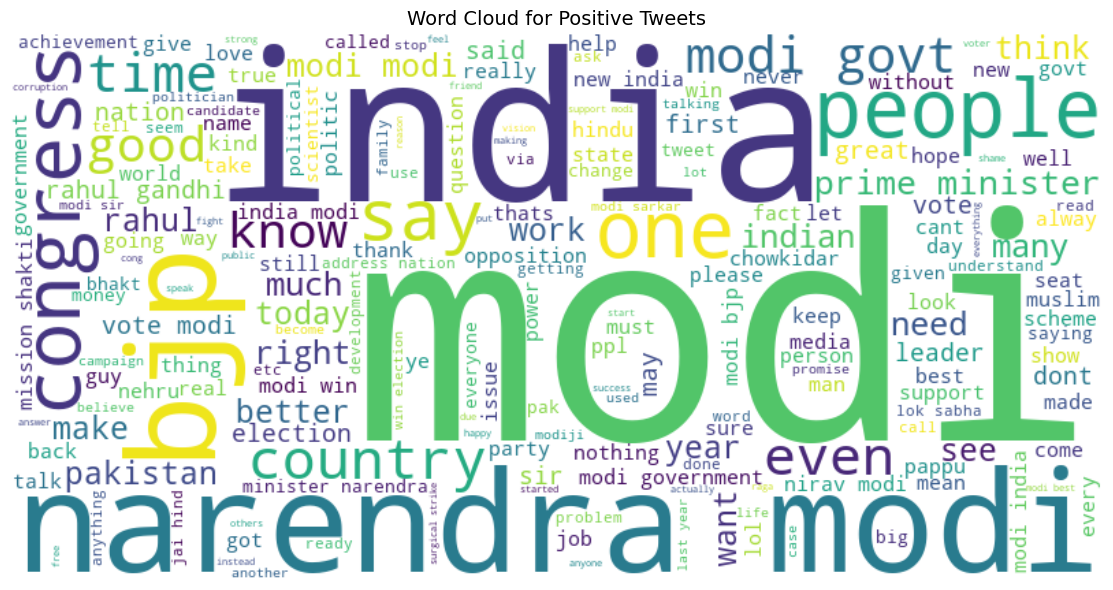

In [36]:
from wordcloud import WordCloud

positive_tweets = ' '.join(df[df['category'] == 1]['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets', fontsize=14)
plt.tight_layout()
plt.savefig('WordCloud.png')
plt.show()

In [34]:
!pip install wordcloud